# Clustering
AKA automatic classification, AKA data segmenation  
[Dr Kieu's Lecture notes on Clustering](http://120.108.116.237/~ktduc/DA/Lecs/Topic02%20Cluster%20Analysis%20Basics%20Jiawei%20Han.pdf)

### Main Types:
1. $k$-Means
2. DBSCAN (Density-based spatial clustering of applications with noise)

### Definiton
Clustering is the process of grouping set of data objects into multiple clusters (or groups) so that objects within a cluster have high similarity, but are very dissimilar to objects in other clusters.

It is a form of **unsupervised** learning (i.e., target value (label) is not provided/unknown).

### Definiton
A **cluster** is a collection of data objects that are similar to one another within the cluster and dissimilar to objects in other clusters.

A cluster of data objects can be treated as an implicit class. Thus, clustering is sometimes called **automatic classification**

### Definiton
Clustering can also be used for **outlier detection**, where outliers (values that are “far away” from any cluster) may be more interesting than common cases.




## $k$-Means Algorithm
Suppose a data set $D$ contains $n$ objects $p$ in Euclidean space

Required to distribute the objects in $D$ into $k$ clusters, $C_1,...,C_k$ such that $C_i \subset D$ and $C_i \cap C_j = \varnothing$ for $1\leq i,j\leq k$

Let the **centroid** (mean) of cluster $i$ be defined as $$c_i = \frac{1}{m_i}\sum_{p\in C_i}p$$ where $m_i$ is the number of objects in cluster $i$  

**Euclidean distance** between two points $x = (x_1,...,x_d)$ and $y = (y_1,...,y_d)$ is defined by $$dist(x,y) = \sqrt{\sum_{j=1}^d (y_j-x_j)^2}$$  

Quality of cluster $C_i$ can be measured by the **within-cluster variation**, which is the sum of squared error (SSE) between all objects in $C_i$ and the centroid $c_i$, defined as $$E = \sum_{i=1}^k \sum_{p\in C_i}dist(p, c_i)^2$$


### The Algorithm 

#### Inputs
- $k$: the number of clusters
- $D$: a data set containing n objects

#### Output
- a set of $k$ clusters

#### Method
- Randomly choose $k$ objects from $D$ as initial cluster centers (centroids)
- **repeat**
    * (re)assign each object to the cluster to which the object is the most similar, based on the mean value of the objects in the cluster
    * update the cluster means (centroids), that is, calculate the mean value of the objects for each cluster
- **until** centroids do not change

![Illustration of k-Means Clustering](Images/k-means.png)

### Python Implementation of $k$-Means using [`sklearn.cluster.KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) (sci-kit learn example 1)
Using data that we defined in a numpy array

Importing numpy, pyplot, sci-kit learn and pretty printer

In [67]:
import numpy as np
import matplotlib.pyplot as pyplot
from sklearn.cluster import KMeans
import pprint
pp = pprint.PrettyPrinter(indent=4)

Adding data to numpy array

In [68]:
X = np.array(
    [
        [2, 2], [3, 4], [6, 8], [7, 10], [10, 14], [9, 10], [7, 9]
    ]
)

Visualizing the data set

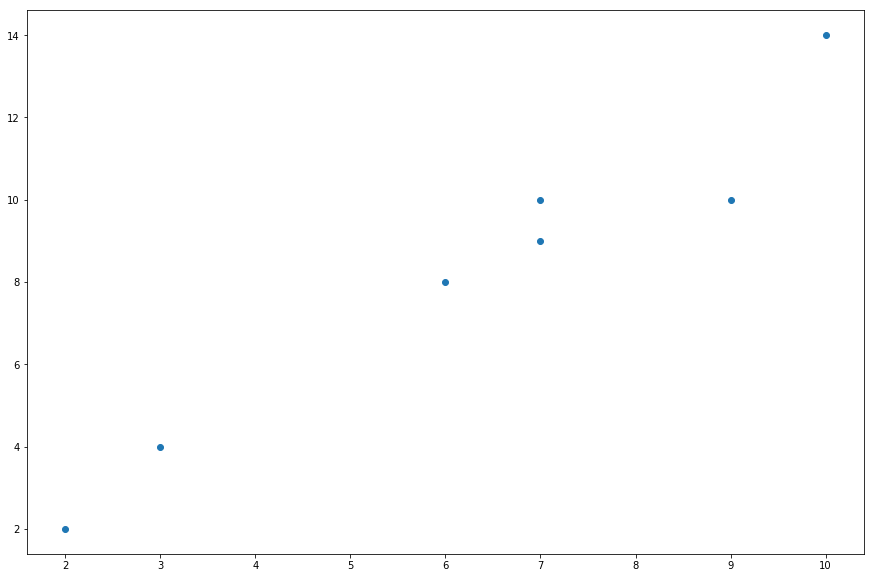

In [69]:
plt.figure(figsize=(15, 10))
plt.scatter(X[:,0], X[:,1])

Running the kmeans algorithm with $k = 2$

The centroids of the data set are
array([[ 7.8, 10.2],
       [ 2.5,  3. ]])


The clusters are as follows...
[2 2] belongs to cluster 1
[3 4] belongs to cluster 1
[6 8] belongs to cluster 0
[ 7 10] belongs to cluster 0
[10 14] belongs to cluster 0
[ 9 10] belongs to cluster 0
[7 9] belongs to cluster 0


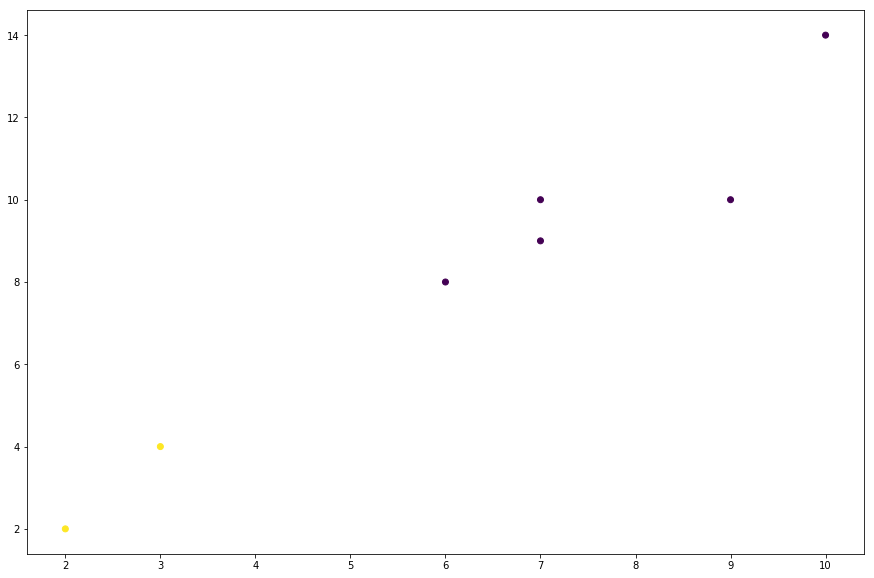

In [70]:
kmeans = KMeans(n_clusters=2).fit(X)

# prints centroids
print('The centroids of the data set are')
pp.pprint(kmeans.cluster_centers_)

# prints labels
print('\n\nThe clusters are as follows...')
for x, label in zip(X,kmeans.labels_):
    print('{} belongs to cluster {}'.format(x, label))

# replotting to show clusters
plt.figure(figsize=(15, 10))
plt.scatter(X[:,0], X[:,1], c=(kmeans.labels_))

Predicting with new points

In [71]:
print(kmeans.predict(
    [
        [0, 0], [4, 4]
    ]
))


[1 1]


### Python Implementation of $k$-Means (sci-kit learn example 2)
Using random data from [`sklearn.datasets.make_blobs`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html)

Imports

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

Randomly creating data points with $k=5$

In [73]:
X, y = make_blobs(n_samples=200, centers=5)  # X is a list of 2-D coordinates, y is a list specifying which cluster each coordinate belongs to [0 to 4]
print(X.shape, y.shape)                      # give us (number of rows, number of features)
print(X, y)

(200, 2) (200,)
[[-6.10985864  6.64090545]
 [-6.73199534 -2.47297173]
 [ 5.09325289  7.41973877]
 [ 4.58315318  3.29064852]
 [-5.94056351  6.49141033]
 [ 4.45819312  4.63244407]
 [ 6.26341788  4.20344921]
 [-2.6548307  -5.64613009]
 [ 4.14429508  7.22558494]
 [-1.54320263  5.98984143]
 [ 6.15154088  6.44359551]
 [-5.71364303 -3.5113692 ]
 [-1.17334116 -7.06425195]
 [-2.10866492 -8.84769971]
 [-0.56103364 -1.66064497]
 [-7.7113982  -0.79512866]
 [-0.48708793 -6.47015591]
 [-0.12790483 -7.02675154]
 [-3.72667827 -7.66456187]
 [-3.96942401  6.29014359]
 [-8.83198033 -2.9562627 ]
 [-4.0257932   5.28048232]
 [-4.60424982  2.55768569]
 [ 5.02668001  4.59065121]
 [ 5.03203413  4.84066942]
 [ 4.82284245  5.09528148]
 [-0.99994562 -0.19178984]
 [-0.04593607 -2.42896312]
 [-2.97830709 -6.63618276]
 [-6.0375309  -1.79009981]
 [ 0.18971618 -1.74737414]
 [-6.76670483 -2.41496736]
 [-2.66385122 -8.59313042]
 [-2.42946933 -4.51137644]
 [ 4.04872191  6.89913326]
 [-2.66109097 -6.69645014]
 [-7.7481438

Visualizing the data set

<function matplotlib.pyplot.show(*args, **kw)>

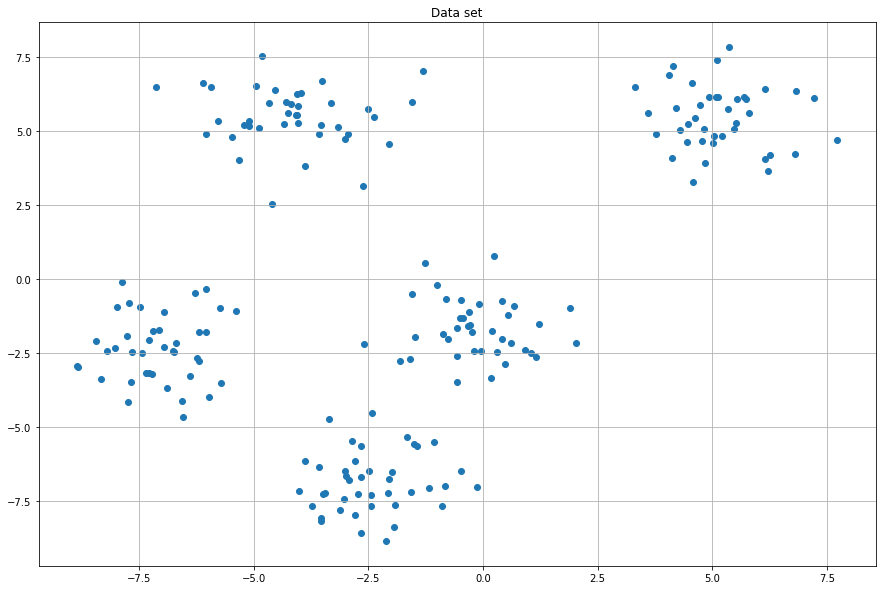

In [74]:
# plotting the dataset with clusters and centroids
fig1 = plt.figure(figsize=(15, 10))
plt.scatter(X[:,0], X[:,1])
plt.grid(True)
plt.title('Data set')
plt.show

In this example, we have specified our own value of $k$ when we created the data set.  
So when we do the $k$-Means, we already know that we should use a value of $k=5$ that optimally reduces the $SSD$ (Sum of Squared Differences).  
In the real world however, we will never know the best value of $k$ to use without testing multiple values of $k$.  
So we do an **Elbow Curve**.  

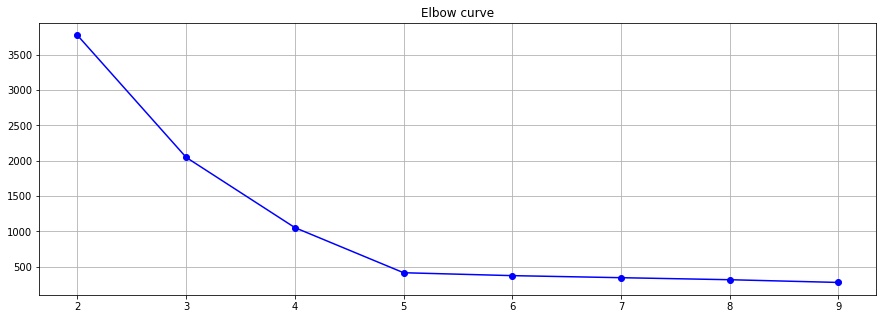

In [75]:
# ELBOW CURVE
distortions = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_) # inertia_ is SSD (sum of squared differences)

# elbow curve plotting (SSD vs number of clusters)
# curve tells us the ideal number of clusters
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 10), distortions, 'bo-')  # range must match to the number of distortions in the for loop
plt.grid(True)
plt.title('Elbow curve')
plt.show()

It is now evident from the Elbow Curve above, that $k>5$ has no significant effect on reducing the $SSD$.  
So we now know to choose $k=5$.

Centroid #1: [-4.15877133  5.48985926]
Centroid #2: [-2.42530835 -6.86429487]
Centroid #3: [5.16642997 5.47065996]
Centroid #4: [-7.0923664  -2.34758522]
Centroid #5: [-0.1552071  -1.68659945]


<function matplotlib.pyplot.show(*args, **kw)>

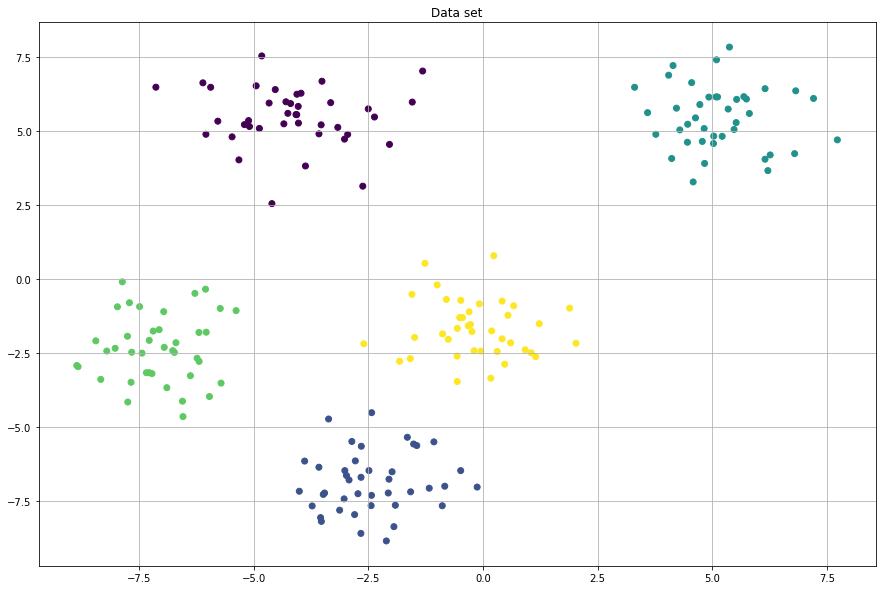

In [76]:
# clustering
clf = KMeans(n_clusters=5)
clf.fit(X)
# print(clf.labels_)  # prints the label for each tupule
# for (value, cluster) in zip(X, clf.labels_):    # prints which point is in which cluster
#     print('{}\t{}'.format(value, cluster))


# printing the centroids
centroids = clf.cluster_centers_
for i in range(len(centroids)):
    print('Centroid #{}: {}'.format(i+1, centroids[i]))
    

# replotting to show clusters
fig1 = plt.figure(figsize=(15, 10))
plt.scatter(X[:,0], X[:,1], c=clf.labels_)
plt.grid(True)
plt.title('Data set')
plt.show